In [1]:
import airfrans as af
import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATASET = "/data/serrano/airfrans/Dataset/"

In [3]:
dataset_list, dataset_name = af.dataset.load(root = PATH_TO_DATASET, task = 'full', train = True)

Loading dataset (task: full, split: train):   2%|▍                         | 14/800 [00:05<04:56,  2.65it/s]


KeyboardInterrupt: 

# 1. EDA

In [4]:
dataset_list[0].shape

(181794, 12)

In [5]:
# to add to the dataset
# rescale the coordinates with a min-max
# 

In [4]:
import numpy as np

In [5]:
import torch

/data/serrano/miniconda3/airfrans/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
MIN_POS = torch.Tensor([-2.5, -1.75]).view(-1, 2)
MAX_POS = torch.Tensor([4.5, 1.75]).view(-1,2)

In [9]:
key_to_index = {
    "x": 0,
    "y": 1,
    "inlet_x": 2,
    "inlet_y": 3,
    "sdf": 4,
    "nx": 5,
    "ny": 6,
    "vx": 7,
    "vy": 8,
    "p": 9,
    "nu":10,
}

In [10]:
for key in key_to_index.keys():
    index = key_to_index[key]
    print(f"key: {key}, index: {index}, mean: {graph2[..., index].mean()}, std: {graph2[..., index].std()}")

NameError: name 'graph2' is not defined

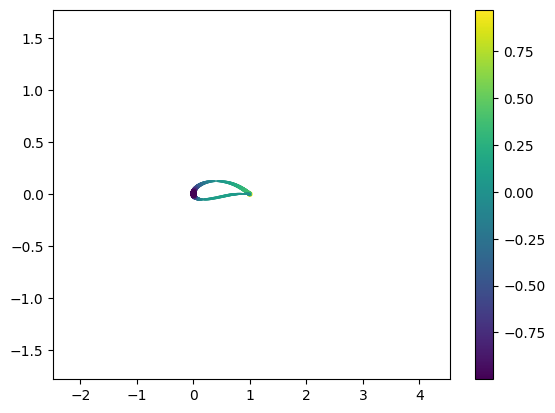

In [12]:
plt.scatter(graph2[..., 0], graph2[..., 1], s=10*abs(graph2[..., 5]), c=graph2[..., 5])
plt.colorbar()

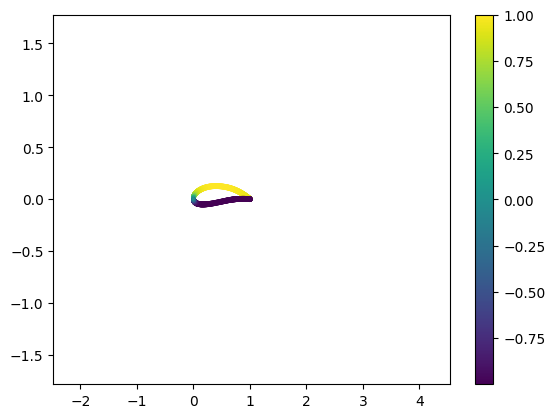

In [13]:
plt.scatter(graph2[..., 0], graph2[..., 1], s=10*abs(graph2[..., 6]), c=graph2[..., 6])
plt.colorbar()

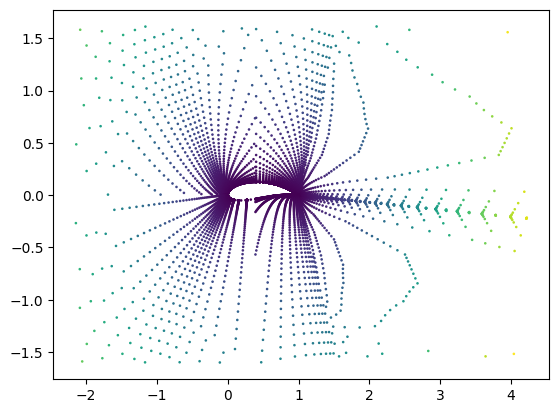

In [14]:
plt.scatter(graph2[::20, 0], graph2[::20, 1], s=0.75, c=graph2[::20, 4])

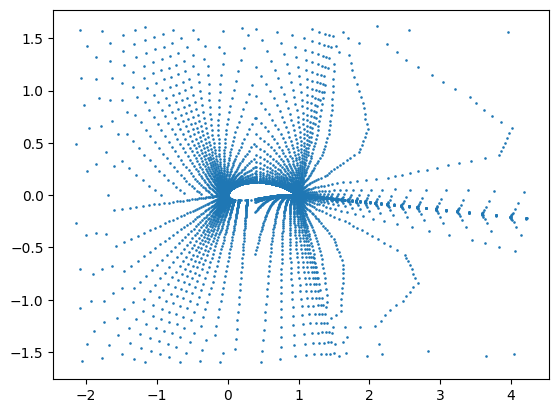

In [15]:
plt.scatter(graph2[::20, 0], graph2[::20, 1], s=0.75)

## Velocity

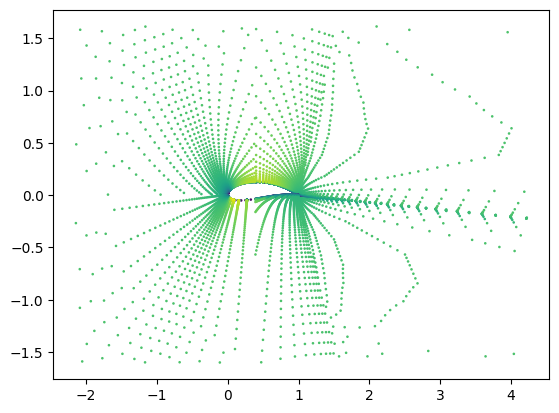

In [16]:
i = key_to_index["vx"]
plt.scatter(graph2[::20, 0], graph2[::20, 1], c= graph2[::20, i], s= 0.75)

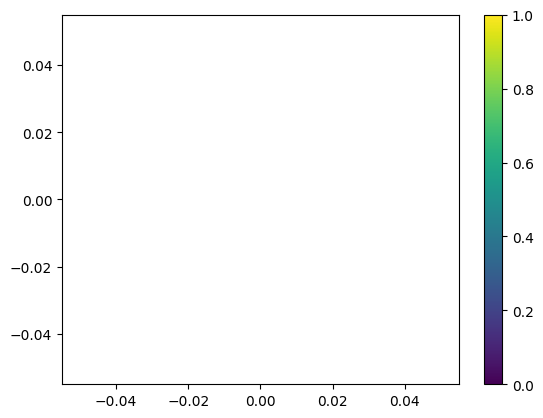

In [17]:
# high vy region
i = key_to_index["vy"]
mask = graph2[...,i] > 50
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

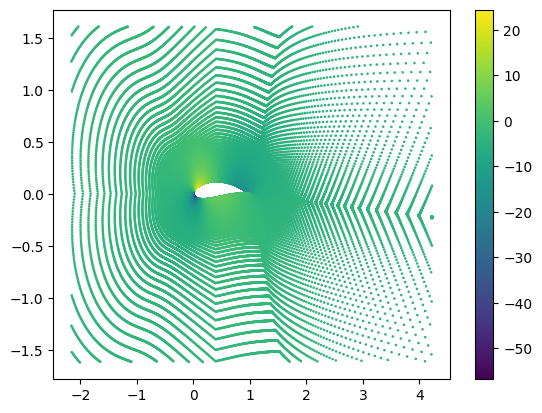

In [18]:
# low vx region
i = key_to_index["vy"]
mask = graph2[...,i] <= 50
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

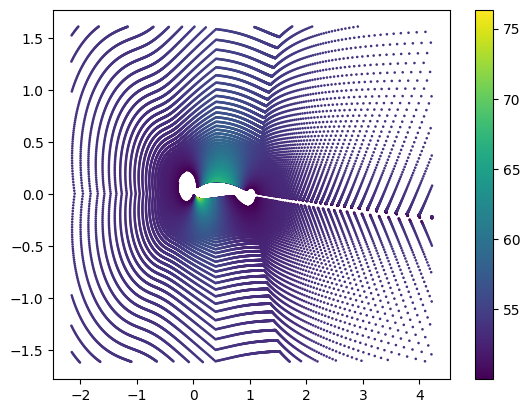

In [19]:
# high vx region
i = key_to_index["vx"]
mask = graph2[...,i] > 50
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

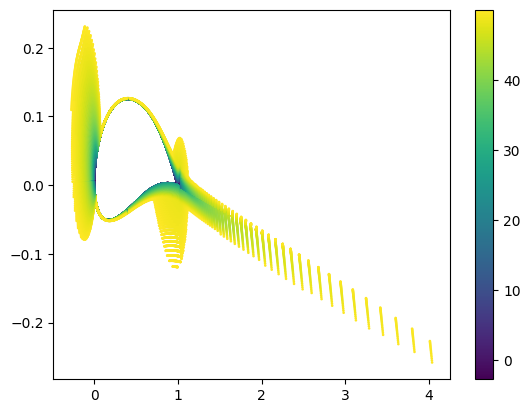

In [20]:
i = key_to_index["vx"]
mask = graph2[...,i] <= 50
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

## Pressure

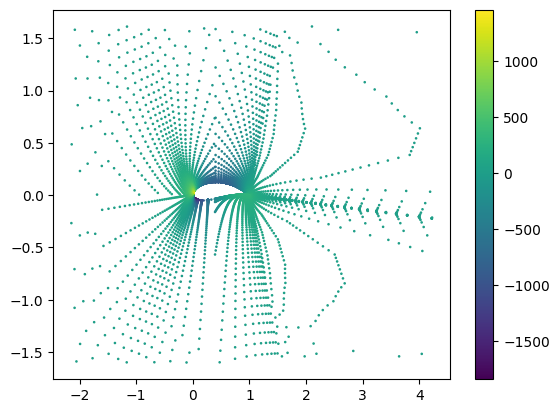

In [21]:
i = key_to_index["p"]
plt.scatter(graph2[::20, 0], graph2[::20, 1], c= graph2[::20, i], s= 0.75)
plt.colorbar()

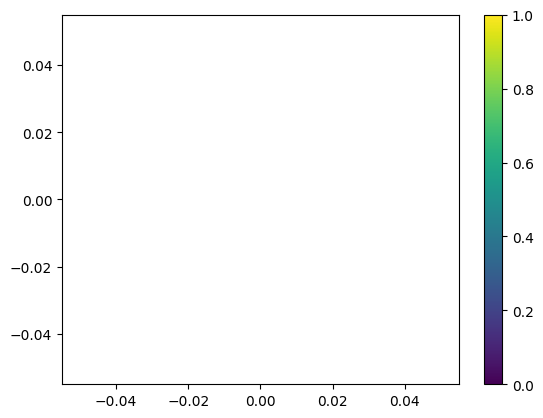

In [22]:
# low pressure region
i = key_to_index["p"]
mask = graph2[...,i] < -30000
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

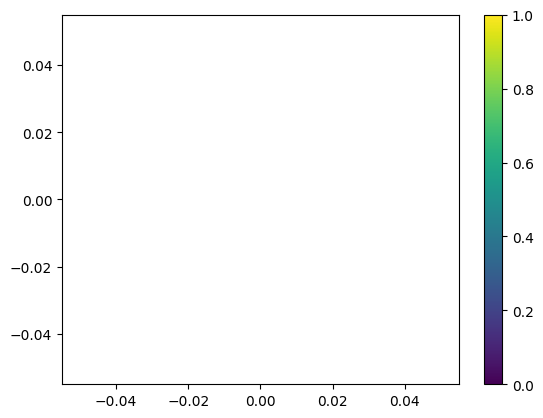

In [23]:
# low pressure region
i = key_to_index["p"]
mask = graph2[...,i] < -20000
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

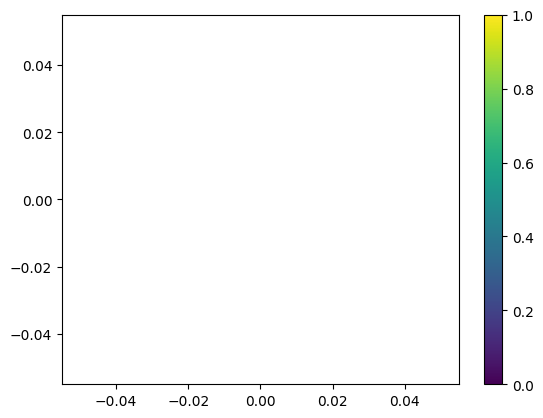

In [24]:
# low pressure region
i = key_to_index["p"]
mask = graph2[...,i] < -10000
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

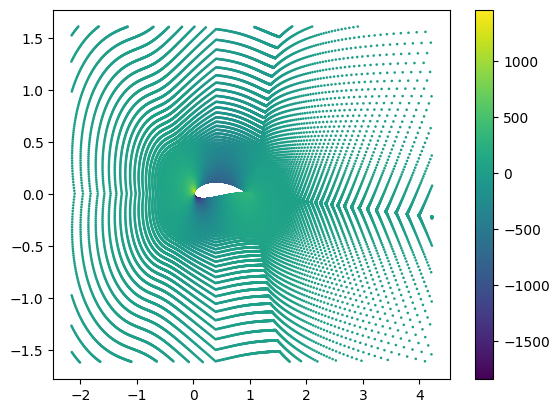

In [25]:
# high pressure region
i = key_to_index["p"]
mask = graph2[...,i] >= -5000
plt.scatter(graph2[mask, 0], graph2[mask, 1], c= graph2[mask, i], s= 0.75)
plt.colorbar()

In [26]:
i = key_to_index["vx"]
print(f"mean: {graph2[..., i].mean()}, std: {graph2[..., i].std()}")

mean: 35.632441047026774, std: 21.052875237278403


In [27]:
simulation = af.Simulation(root = PATH_TO_DATASET, name = 'airFoil2D_SST_43.597_5.932_3.551_3.1_1.0_18.252', T = 298.15)

In [28]:
simulation

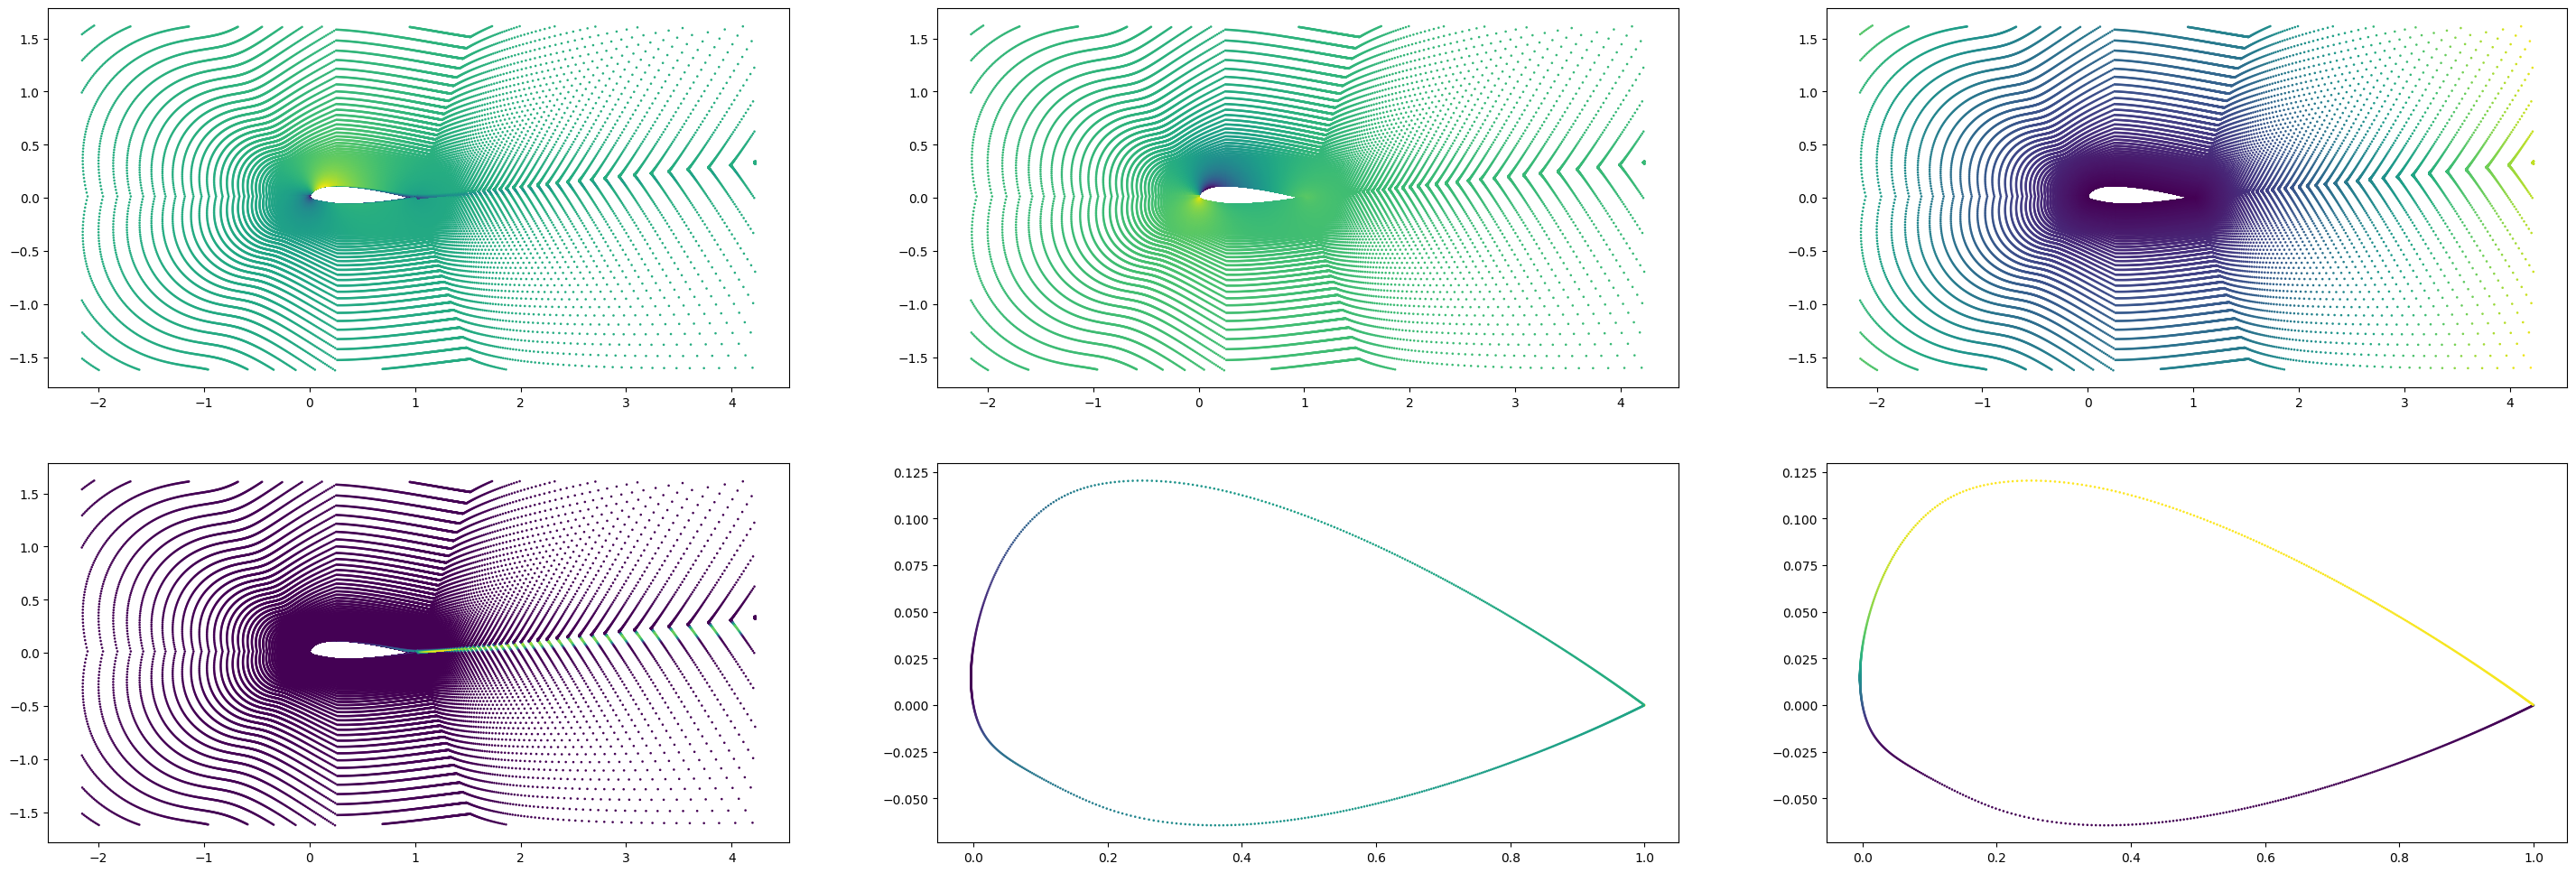

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize = (36, 12))
ax[0, 0].scatter(simulation.position[:, 0], simulation.position[:, 1], c = simulation.velocity[:, 0], s = 0.75)
ax[0, 1].scatter(simulation.position[:, 0], simulation.position[:, 1], c = simulation.pressure[:, 0], s = 0.75)
ax[0, 2].scatter(simulation.position[:, 0], simulation.position[:, 1], c = simulation.sdf[:, 0], s = 0.75)
ax[1, 0].scatter(simulation.position[:, 0], simulation.position[:, 1], c = simulation.nu_t[:, 0], s = 0.75)
ax[1, 1].scatter(simulation.airfoil_position[:, 0], simulation.airfoil_position[:, 1], c = simulation.airfoil_normals[:, 0], s = 0.75)
ax[1, 2].scatter(simulation.airfoil_position[:, 0], simulation.airfoil_position[:, 1], c = simulation.airfoil_normals[:, 1], s = 0.75)

In [30]:
internal_normals = simulation.normals[simulation.surface]
print((internal_normals == simulation.airfoil_normals).all())

False


In [31]:
reordered_normals = af.reorganize(simulation.position[simulation.surface], simulation.airfoil_position, internal_normals)
print((reordered_normals == simulation.airfoil_normals).all())

True


In [32]:
sampling_volume_uniform = simulation.sampling_volume(16000, density = 'uniform')
sampling_volume_mesh = simulation.sampling_volume(16000, density = 'mesh_density')

sampling_surface_uniform = simulation.sampling_surface(500, density = 'uniform')
sampling_surface_mesh = simulation.sampling_surface(500, density = 'mesh_density')

sampling_mesh = simulation.sampling_mesh(16000)
sampling_mesh_surface = sampling_mesh[sampling_mesh[:, 2].astype('bool')]

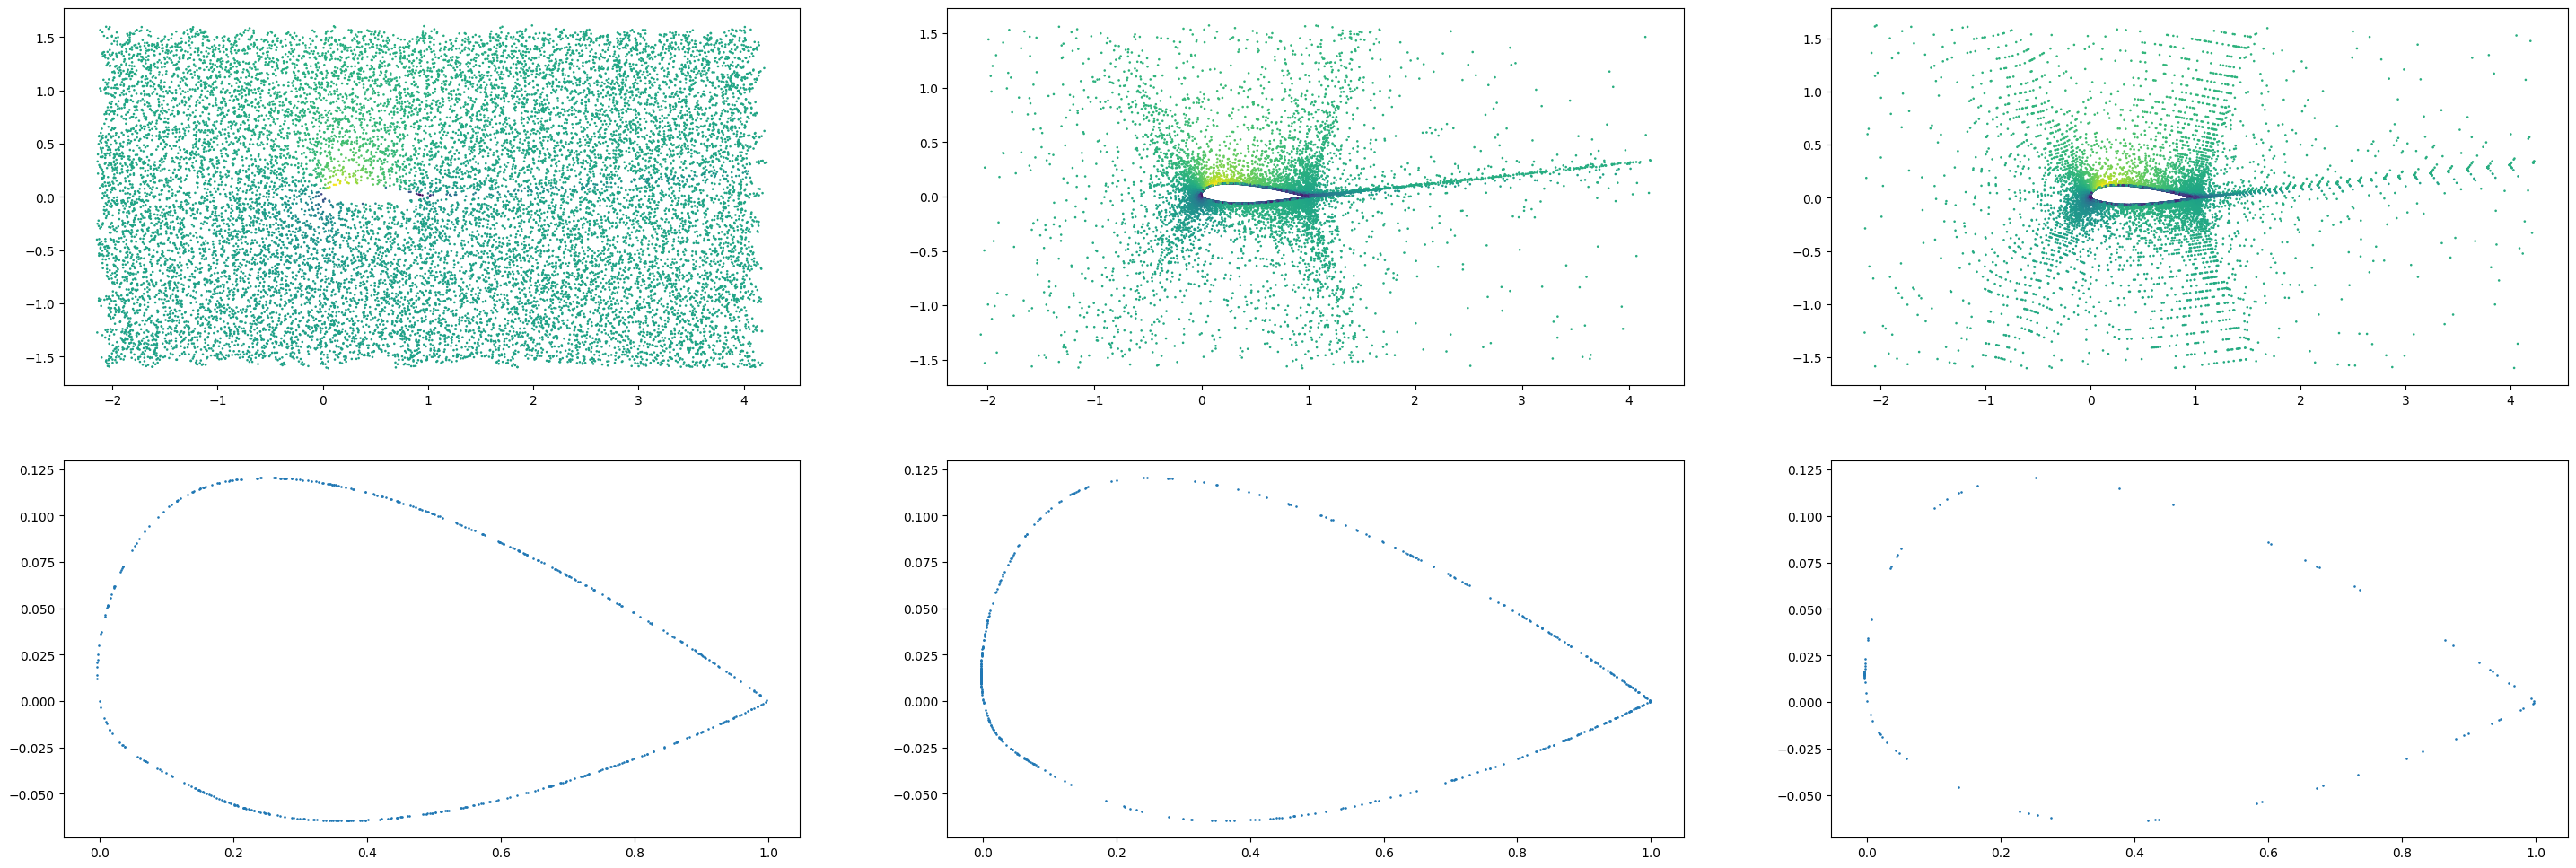

In [33]:
fig, ax = plt.subplots(2, 3, figsize = (36, 12))
ax[0, 0].scatter(sampling_volume_uniform[:, 0], sampling_volume_uniform[:, 1], c = sampling_volume_uniform[:, 3], s = 0.75)
ax[0, 1].scatter(sampling_volume_mesh[:, 0], sampling_volume_mesh[:, 1], c = sampling_volume_mesh[:, 3], s = 0.75)
ax[0, 2].scatter(sampling_mesh[:, 0], sampling_mesh[:, 1], c = sampling_mesh[:, 8], s = 0.75)
ax[1, 0].scatter(sampling_surface_uniform[:, 0], sampling_surface_uniform[:, 1], s = 0.75)
ax[1, 1].scatter(sampling_surface_mesh[:, 0], sampling_surface_mesh[:, 1], s = 0.75)
ax[1, 2].scatter(sampling_mesh_surface[:, 0], sampling_mesh_surface[:, 1], s = 0.75)

In [34]:
100*200

20000

# 2. Try to fit a single image for each channel

In [3]:
import os
import sys
from pathlib import Path
sys.path.append("/home/serrano/Projects/INR_domain_decomposition/")

from src.data.dataset import GeometryDataset, KEY_TO_INDEX
from torch_geometric.loader import DataLoader

import einops
import json
import hydra
import numpy as np
import torch
import torch.nn as nn
import wandb
from coral.mlp import MLP, Derivative, ResNet
from omegaconf import DictConfig, OmegaConf
from torchdiffeq import odeint

from coral.losses import batch_mse_rel_fn
from coral.siren import ModulatedSiren
from coral.utils.data import (
    shape2coordinates,
    DatasetWithCode,
    set_seed,
)
from coral.utils.plot import show
from coral.utils.scheduler import learning_rate_scheduler
from graph_metalearning import outer_step

/data/serrano/miniconda3/airfrans/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import yaml
from omegaconf import DictConfig

In [5]:
with open('../config/basic.yaml', 'r') as f:
    cfg = yaml.safe_load(f)
cfg = DictConfig(cfg)

In [6]:
data_dir = cfg.data.dir
task = cfg.data.task
data_to_encode = cfg.data.data_to_encode
score = cfg.data.score
ntrain = cfg.data.ntrain
ntest = cfg.data.ntest
seed = cfg.data.seed

# optim
batch_size = cfg.optim.batch_size
batch_size_val = (
    batch_size if cfg.optim.batch_size_val == None else cfg.optim.batch_size_val
)
lr_inr = cfg.optim.lr_inr
lr_code = cfg.optim.lr_code
meta_lr_code = cfg.optim.meta_lr_code
weight_decay_code = cfg.optim.weight_decay_code
inner_steps = cfg.optim.inner_steps
test_inner_steps = cfg.optim.test_inner_steps
epochs = cfg.optim.epochs
weight_decay = cfg.optim.weight_decay

# inr
model_type = cfg.inr.model_type
latent_dim = cfg.inr.latent_dim
depth = cfg.inr.depth
hidden_dim = cfg.inr.hidden_dim
w0 = cfg.inr.w0
use_latent = cfg.inr.use_latent
modulate_scale = cfg.inr.modulate_scale
modulate_shift = cfg.inr.modulate_shift
hypernet_depth = cfg.inr.hypernet_depth
hypernet_width = cfg.inr.hypernet_width
loss_type = cfg.inr.loss_type
gamma = cfg.inr.gamma

In [7]:
data_to_encode = 'vx'

In [34]:
data_dir = '/data/serrano/airfrans/'
print('data_dir', data_dir)

# train
with open(Path(data_dir) / 'Dataset/manifest.json', 'r') as f:
    manifest = json.load(f)

manifest_train = manifest[task + '_train']
testset = manifest[task + '_test'] if task != 'scarce' else manifest['full_test']
n = int(.9*len(manifest_train))

print("len manifest train", manifest_train, n)

trainset = manifest_train[:16] # was [:-n] ???
valset = manifest_train[-16:]

ntrain = len(trainset)
nval = len(valset)

data_dir /data/serrano/airfrans/
len manifest train ['airFoil2D_SST_36.622_11.319_3.941_5.424_1.0_16.283', 'airFoil2D_SST_58.831_-3.563_2.815_4.916_10.078', 'airFoil2D_SST_43.327_8.905_4.236_6.511_10.744', 'airFoil2D_SST_89.151_4.462_0.974_4.094_1.0_19.856', 'airFoil2D_SST_87.422_2.992_1.895_3.128_1.0_10.656', 'airFoil2D_SST_42.531_-3.927_1.264_6.838_0.0_7.489', 'airFoil2D_SST_46.246_9.78_3.769_2.353_17.745', 'airFoil2D_SST_67.481_-1.259_5.136_2.438_18.882', 'airFoil2D_SST_45.701_-1.925_0.671_7.455_0.0_12.285', 'airFoil2D_SST_85.488_6.826_3.112_3.445_1.0_17.471', 'airFoil2D_SST_56.177_2.108_1.208_3.592_0.0_14.763', 'airFoil2D_SST_46.0_-0.095_2.322_1.874_16.58', 'airFoil2D_SST_81.846_10.688_0.402_4.721_0.0_11.955', 'airFoil2D_SST_56.749_1.468_1.967_7.293_1.0_8.866', 'airFoil2D_SST_41.403_-2.446_1.908_4.316_0.0_5.008', 'airFoil2D_SST_44.858_13.36_1.546_3.174_1.0_10.604', 'airFoil2D_SST_71.85_7.865_2.88_6.646_0.0_18.137', 'airFoil2D_SST_90.26_10.644_0.076_3.962_1.0_18.874', 'airFoil2D_SST

In [35]:
#default sample is none
trainset = GeometryDataset(trainset, key=data_to_encode, latent_dim=latent_dim, norm=True, sample=None, n_boot=16000)
print("loaded train")
valset = GeometryDataset(valset, key=data_to_encode, latent_dim=latent_dim, sample=None, n_boot=16000, coef_norm=trainset.coef_norm)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
# test
val_loader = DataLoader(valset, batch_size=batch_size_val, shuffle=True)
device = torch.device("cuda")

100%|███████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.72it/s]


coef_norm (array([ 5.0193095e-01,  1.1042321e-02,  5.7883270e+01,  3.8414328e+00,
        2.3085196e-01, -1.6645475e-03, -7.8367477e-05], dtype=float32), array([ 0.7015379 ,  0.33686727, 17.840536  ,  5.4303937 ,  0.4738172 ,
        0.04192645,  0.06222026], dtype=float32), array([ 3.9744095e+01,  7.1306376e+00, -2.1624887e+02,  7.3773653e-04],
      dtype=float32), array([2.7370657e+01, 2.5211699e+01, 1.7900901e+03, 2.3892892e-03],
      dtype=float32))
loaded train


100%|███████████████████████████████████████████████████████████████████████| 16/16 [00:05<00:00,  2.84it/s]

coef_norm (array([ 5.0193095e-01,  1.1042321e-02,  5.7883270e+01,  3.8414328e+00,
        2.3085196e-01, -1.6645475e-03, -7.8367477e-05], dtype=float32), array([ 0.7015379 ,  0.33686727, 17.840536  ,  5.4303937 ,  0.4738172 ,
        0.04192645,  0.06222026], dtype=float32), array([ 3.9744095e+01,  7.1306376e+00, -2.1624887e+02,  7.3773653e-04],
      dtype=float32), array([2.7370657e+01, 2.5211699e+01, 1.7900901e+03, 2.3892892e-03],
      dtype=float32))


In [116]:
class PositionalEmbedder(nn.Module):
    """PyTorch implementation of regular positional embedding, as used in the original NeRF and Transformer papers.
    """
    def __init__(self, num_freq, max_freq_log2, log_sampling=False, include_input=True, input_dim=3):
        """Initialize the module.
        Args:
            num_freq (int): The number of frequency bands to sample. 
            max_freq_log2 (int): The maximum frequency.
                                 The bands will be sampled at regular intervals in [0, 2^max_freq_log2].
            log_sampling (bool): If true, will sample frequency bands in log space.
            include_input (bool): If true, will concatenate the input.
            input_dim (int): The dimension of the input coordinate space.
        Returns:
            (void): Initializes the encoding.
        """
        super().__init__()

        self.num_freq = num_freq
        self.max_freq_log2 = max_freq_log2
        self.log_sampling = log_sampling
        self.include_input = include_input
        self.out_dim = 0
        if include_input:
            self.out_dim += input_dim

        if self.log_sampling:
            self.bands = 2.0**torch.linspace(0.0, max_freq_log2, steps=num_freq)
        else:
            self.bands = torch.linspace(1, 2.0**max_freq_log2, steps=num_freq)

        # The out_dim is really just input_dim + num_freq * input_dim * 2 (for sin and cos)
        self.out_dim += self.bands.shape[0] * input_dim * 2
        self.bands = nn.Parameter(self.bands).requires_grad_(False)
    
    def forward(self, coords):
        """Embeds the coordinates.
        Args:
            coords (torch.FloatTensor): Coordinates of shape [N, input_dim]
        Returns:
            (torch.FloatTensor): Embeddings of shape [N, input_dim + out_dim] or [N, out_dim].
        """
        N = coords.shape[0]
        winded = (coords[:,None] * self.bands[None,:,None]).reshape(
            N, coords.shape[1] * self.num_freq)
        encoded = torch.cat([torch.sin(winded), torch.cos(winded)], dim=-1)
        if self.include_input:
            encoded = torch.cat([coords, encoded], dim=-1)
        return encoded


In [103]:
class FourierFeatures(nn.Module):
    def __init__(self, num_frequencies=4):
        super().__init__()
        self.num_frequencies = num_frequencies
        self.frequencies = np.pi*2**(torch.arange(0, num_frequencies)).cuda()
    def forward(self, x):
        f = x.unsqueeze(-1) * self.frequencies
        f = f.sum(-2)
        return torch.cat([torch.sin(f), torch.cos(f)], axis=-1)

In [82]:
embebding = FourierFeatures(8)

In [83]:
embebding(torch.ones(1,2))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [168]:
class FourierMLP(nn.Module):
    def __init__(self, input_dim=2, output_dim=1, width=256, depth=3, num_frequencies=8):
        super().__init__()
        #self.embedding = FourierFeatures(num_frequencies)
        self.embedding = PositionalEmbedder(num_frequencies, num_frequencies)
        self.in_channels = [4*num_frequencies+2] + [width]*(depth-1)
        self.out_channels = [width]*(depth-1) + [output_dim]
        self.layers = nn.ModuleList([nn.Linear(self.in_channels[k], self.out_channels[k]) for k in range(depth)])
        self.depth=depth
    def forward(self, x):
        x = self.embedding(x)
        for k in range(self.depth-1):
            x = self.layers[k](x)
            x = torch.relu(x)
        out = self.layers[-1](x)
        return out

In [57]:
torch.arange(1, 13)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [159]:
from coral.siren import Siren

In [160]:
w0 = 256
inr = Siren(dim_in=2,
            dim_hidden=256,
            dim_out=1,
            num_layers=3,
            w0=w0,
            w0_initial=w0,
            use_bias=True,
        ).cuda()

In [161]:
epochs=5000
optimizer = torch.optim.Adam(inr.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=epochs//5, gamma=0.5)

In [169]:
for graph, idx in train_loader:
    break

In [170]:
index=0

In [184]:
coordinates = graph.pos[graph.batch == index].cuda()
images = graph.images[graph.batch == index].cuda()

In [165]:
for step in range(epochs):
    mask = torch.randperm(coordinates.shape[0])[:18000]
    pred = inr(coordinates[mask])
    loss = ((pred - images[mask])**2).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()
    if step % 1000 == 0:
        print(f"loss: {((pred - images[mask])**2).mean()}")

loss: 0.4866049289703369
loss: 0.4804319739341736
loss: 0.4830385148525238
loss: 0.49002230167388916


KeyboardInterrupt: 

In [185]:
w0 = 30
inr = FourierMLP().cuda()

In [186]:
epochs=10000
optimizer = torch.optim.Adam(inr.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=epochs//5, gamma=0.5)

In [187]:
for step in range(epochs):
    #mask = torch.randperm(coordinates.shape[0])[:18000]
    pred = inr(coordinates[:18000])
    loss = ((pred - images[:18000])**2).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()
    if step % 1000 == 0:
        print(f"loss: {((pred - images[:18000])**2).mean()}")

loss: 0.48493099212646484
loss: 0.0006087552173994482
loss: 0.0007891831919550896
loss: 0.0001611326588317752
loss: 0.0003886421036440879
loss: 3.6483317671809345e-05
loss: 5.942316784057766e-05
loss: 2.1661597202182747e-05
loss: 1.7802492948248982e-05
loss: 1.4730023394804448e-05


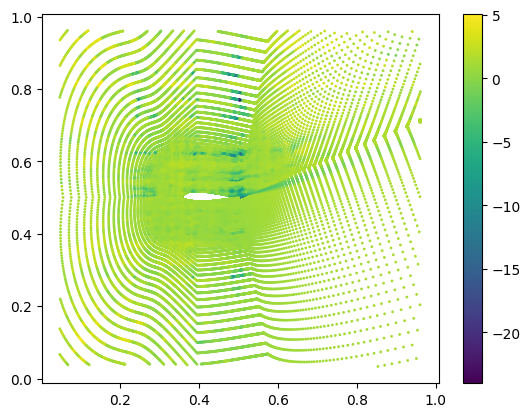

In [188]:
pred = inr(coordinates)
plt.scatter(coordinates[..., 0].detach().cpu(), coordinates[..., 1].detach().cpu(), c=gamma*pred.cpu().detach(), s=1)
plt.colorbar()

In [183]:
gamma = 10
coordinates = torch.cat([graph.pos[mask], graph[2]], axis=-1)
images = graph.images[mask].cuda()
images_scaled = images/gamma # images/ gamma

TypeError: expected Tensor as element 1 in argument 0, but got Data

In [37]:
w0 = 30
inr = Siren(dim_in=3,
            dim_hidden=256,
            dim_out=1,
            num_layers=5,
            w0=w0,
            w0_initial=w0,
            use_bias=True,
        ).cuda()

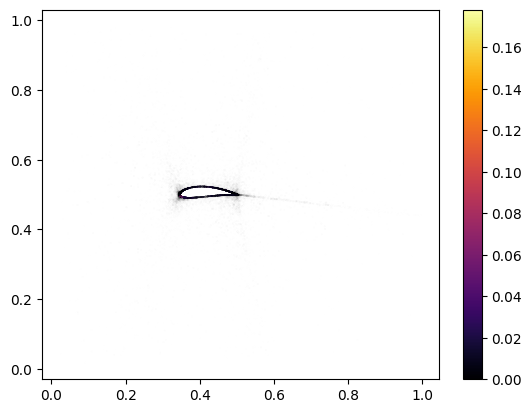

In [30]:
diff = ((gamma*pred - images)**2).cpu().detach()
plt.scatter(coordinates[..., 0].detach().cpu(), coordinates[..., 1].detach().cpu(), s=diff, c=diff, cmap='inferno')
plt.colorbar()

In [31]:
diff.mean()

tensor(0.0017)

In [32]:
mean_in, mean_out, std_in, std_out = trainset.coef_norm

In [33]:
std_in

array([ 4.1555424e+01,  8.7420683e+00, -2.4084377e+02,  7.6887710e-04],
      dtype=float32)

In [34]:
index_trained = idx[0]

In [35]:
graph_hr = dataset_list[index_trained]

NameError: name 'dataset_list' is not defined

In [183]:
pos_hr = torch.Tensor(graph_hr[..., :2])
pos_hr = (pos_hr - MIN_POS) / (MAX_POS - MIN_POS)

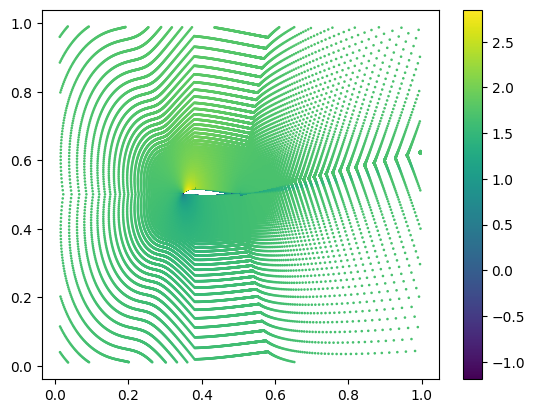

In [184]:
v_hr = (graph_hr[..., key_to_index['vx']] -mean_out[0] )/std_out[0]
plt.scatter(pos_hr[..., 0], pos_hr[..., 1], s=0.75, c= v_hr)
plt.colorbar()

In [185]:
pred_hr = inr(torch.Tensor(pos_hr).cuda()).cpu().detach()*gamma

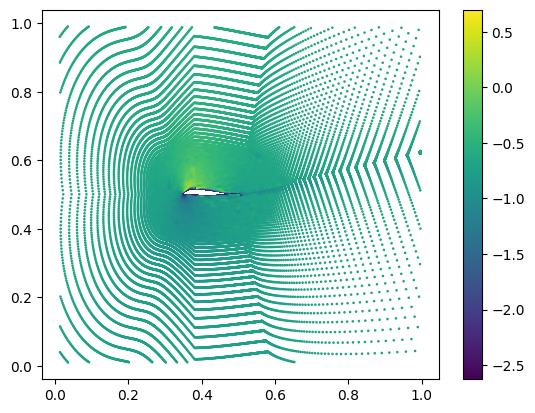

In [186]:
plt.scatter(pos_hr[..., 0], pos_hr[..., 1], s=0.75, c= pred_hr)
plt.colorbar()

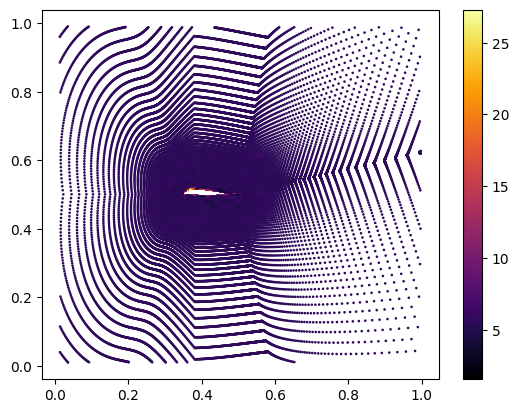

In [188]:
diff = ((pred_hr.detach().cpu().squeeze() - v_hr)**2)
plt.scatter(pos_hr[..., 0], pos_hr[..., 1], s=0.75, c= diff, cmap="inferno")
plt.colorbar()

# 3. With mesh sampling

In [191]:
trainset = manifest_train[:n] # was [:-n] ???
valset = manifest_train[n:]

In [194]:
#default sample is none
trainset2 = GeometryDataset(trainset, key=data_to_encode, latent_dim=latent_dim, norm=True, sample=None, n_boot=16000)
print("loaded train")
valset2 = GeometryDataset(valset, key=data_to_encode, latent_dim=latent_dim, sample=None, n_boot=16000, coef_norm=trainset2.coef_norm)

train_loader2 = DataLoader(trainset2, batch_size=batch_size, shuffle=True)
# test
val_loader2 = DataLoader(valset2, batch_size=batch_size_val, shuffle=True)
device = torch.device("cuda")

100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [04:24<00:00,  2.72it/s]


coef_norm (array([ 5.0067395e-01,  1.1246346e-02,  6.1503807e+01,  4.8500433e+00,
        2.3172970e-01, -1.6548282e-03, -8.6467640e-05], dtype=float32), array([ 0.7040369 ,  0.3364    , 17.780106  ,  6.284955  ,  0.4752076 ,
        0.04153645,  0.06240817], dtype=float32), array([ 4.2436943e+01,  9.6964874e+00, -4.5236975e+02,  7.9545029e-04],
      dtype=float32), array([2.9641506e+01, 3.0877468e+01, 2.9632727e+03, 2.9404047e-03],
      dtype=float32))
loaded train


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:30<00:00,  2.66it/s]


coef_norm (array([ 5.0067395e-01,  1.1246346e-02,  6.1503807e+01,  4.8500433e+00,
        2.3172970e-01, -1.6548282e-03, -8.6467640e-05], dtype=float32), array([ 0.7040369 ,  0.3364    , 17.780106  ,  6.284955  ,  0.4752076 ,
        0.04153645,  0.06240817], dtype=float32), array([ 4.2436943e+01,  9.6964874e+00, -4.5236975e+02,  7.9545029e-04],
      dtype=float32), array([2.9641506e+01, 3.0877468e+01, 2.9632727e+03, 2.9404047e-03],
      dtype=float32))


In [276]:
w0 = 30
inr = Siren(dim_in=2,
            dim_hidden=256,
            dim_out=1,
            num_layers=5,
            w0=w0,
            w0_initial=w0,
            use_bias=True,
        ).cuda()

In [277]:
optimizer = torch.optim.Adam(inr.parameters(), lr=1e-4)

In [278]:
for graph, idx in train_loader2:
    break

In [279]:
index = 0
mask = graph.batch == index

In [280]:
gamma = 10
coordinates = graph.pos[mask].cuda()
images = graph.images[mask].cuda()
images_scaled = images/gamma # images/ gamma

In [281]:
coords_sub = coordinates[::10]
images_sub = images_scaled[::10]

In [282]:
images_sub.shape

torch.Size([16028, 1])

In [283]:
pred.shape

torch.Size([17950, 1])

In [284]:
epochs=10000
for step in range(epochs):
    pred = inr(coords_sub)
    loss = ((pred - images_sub)**2).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 200 == 0:
        print(f"loss: {((gamma*(pred - images_sub))**2).mean()}")

loss: 1.617484211921692
loss: 0.18210963904857635
loss: 0.23343124985694885
loss: 0.1408294141292572
loss: 0.12923815846443176
loss: 0.17769351601600647
loss: 0.1420958936214447
loss: 0.11587870866060257
loss: 0.10722023993730545
loss: 0.12579309940338135
loss: 0.20803788304328918
loss: 0.1054709255695343
loss: 0.2015542834997177
loss: 0.08223389089107513
loss: 0.08908189833164215
loss: 0.1095796599984169
loss: 0.11075668036937714
loss: 0.09244582802057266
loss: 0.15665967762470245
loss: 0.0776786357164383
loss: 0.09610281139612198
loss: 0.08589402586221695
loss: 0.078227698802948
loss: 0.096023328602314
loss: 0.08573851734399796
loss: 0.08980237692594528
loss: 0.09794095903635025
loss: 0.0983344167470932
loss: 0.12227803468704224
loss: 0.0721668154001236
loss: 0.11731236428022385
loss: 0.09404091536998749
loss: 0.07896041125059128
loss: 0.0675535574555397
loss: 0.07446419447660446
loss: 0.07357921451330185
loss: 0.08298853784799576
loss: 0.10299757122993469
loss: 0.07567496597766876
l

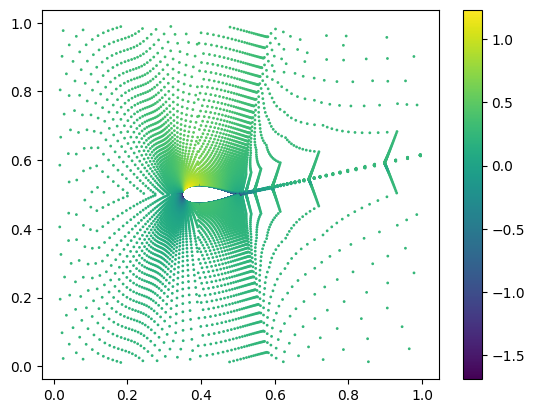

In [273]:
plt.scatter(coords_sub[..., 0].detach().cpu(), coords_sub[..., 1].detach().cpu(), c=gamma*images_sub.detach().cpu(), s=1)
plt.colorbar()

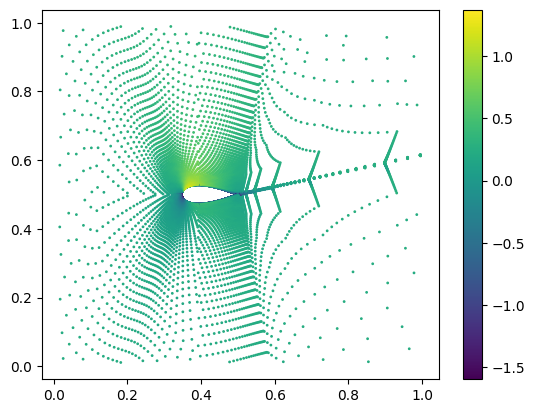

In [274]:
plt.scatter(coords_sub[..., 0].detach().cpu(), coords_sub[..., 1].detach().cpu(), c=gamma*pred.detach().cpu(), s=1)
plt.colorbar()

In [321]:
w0 = 30
inr = Siren(dim_in=2,
            dim_hidden=256,
            dim_out=1,
            num_layers=5,
            w0=w0,
            w0_initial=w0,
            use_bias=True,
        ).cuda()

In [322]:
optimizer = torch.optim.Adam(inr.parameters(), lr=1e-4)

In [323]:
x_mask = (coordinates[..., 0] < 0.6) & (coordinates[..., 0] > 0.4)
y_mask = (coordinates[..., 1] < 0.6) & (coordinates[..., 1] > 0.4)
mask = x_mask & y_mask

In [324]:
coords_sub = (coordinates[mask] - 0.4)*100
images_sub = images_scaled[mask]

In [325]:
epochs=10000
for step in range(epochs):
    pred = inr(coords_sub)
    loss = ((pred - images_sub)**2).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 200 == 0:
        print(f"loss: {((gamma*(pred - images_sub))**2).mean()}")

loss: 1.034475564956665
loss: 0.013061603531241417
loss: 0.007928073406219482
loss: 0.004260915331542492
loss: 0.0032179937697947025
loss: 0.0033631008118391037
loss: 0.0023756169248372316
loss: 0.0017124955775216222
loss: 0.0019903641659766436
loss: 0.002891495358198881
loss: 0.0009753579506650567
loss: 0.0012166238157078624
loss: 0.0012091930257156491
loss: 0.001270992448553443
loss: 0.0014312054263427854
loss: 0.0009011279908008873
loss: 0.0018298239447176456
loss: 0.0017821554793044925
loss: 0.0006422006990760565
loss: 0.0006973950075916946
loss: 0.0013524823589250445
loss: 0.00138726772274822
loss: 0.0014934593345969915
loss: 0.0012435703538358212
loss: 0.0017909595044329762
loss: 0.0014233742840588093
loss: 0.0013678964460268617
loss: 0.0006341334083117545
loss: 0.0009100615861825645
loss: 0.000862468674313277
loss: 0.0013830516254529357
loss: 0.0015914434334263206
loss: 0.0013916543684899807
loss: 0.00035944324918091297
loss: 0.0005034864880144596
loss: 0.0008461619727313519
los

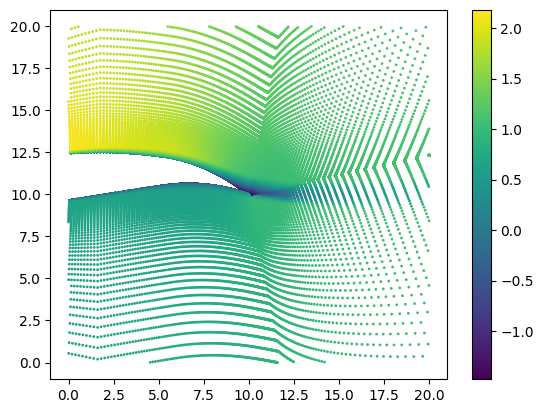

In [326]:
plt.scatter(coords_sub[..., 0].detach().cpu(), coords_sub[..., 1].detach().cpu(), c=gamma*images_sub.detach().cpu(), s=1)
plt.colorbar()

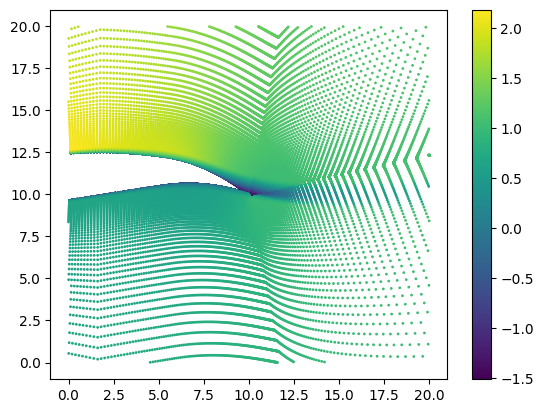

In [327]:
plt.scatter(coords_sub[..., 0].detach().cpu(), coords_sub[..., 1].detach().cpu(), c=gamma*pred.detach().cpu(), s=1)
plt.colorbar()

In [ ]:
coord_plt

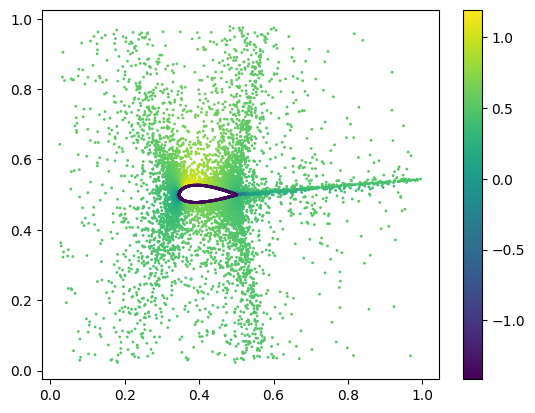

In [128]:
img_plt = images.detach().cpu()
pred_plt = pred.detach().cpu()
coord_plt = coordinates.detach().cpu()
plt.scatter(coord_plt[..., 0], coord_plt[..., 1], c=img_plt, s=1)
plt.colorbar()

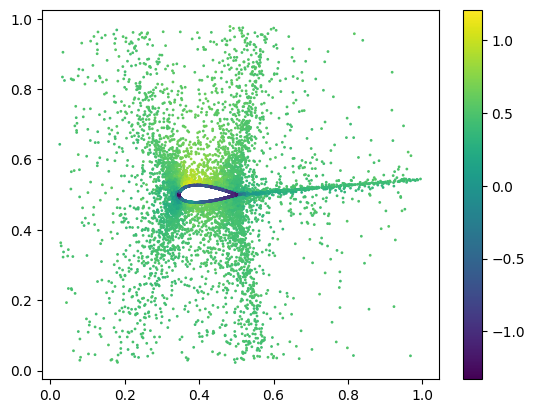

In [129]:
plt.scatter(coord_plt[..., 0], coord_plt[..., 1], c=pred_plt*gamma, s=1)
plt.colorbar()

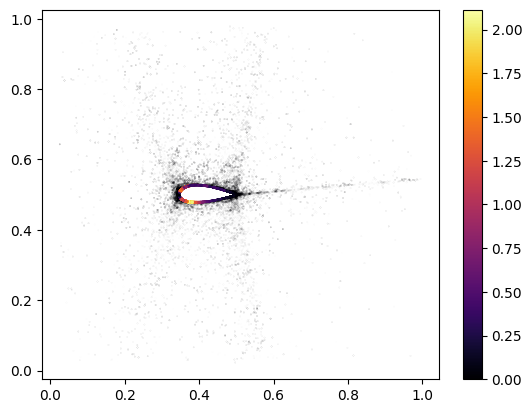

In [130]:
plt.scatter(coord_plt[..., 0], coord_plt[..., 1], c=(pred_plt*gamma-img_plt)**2, s=(pred_plt*gamma-img_plt)**2, cmap="inferno")
plt.colorbar()

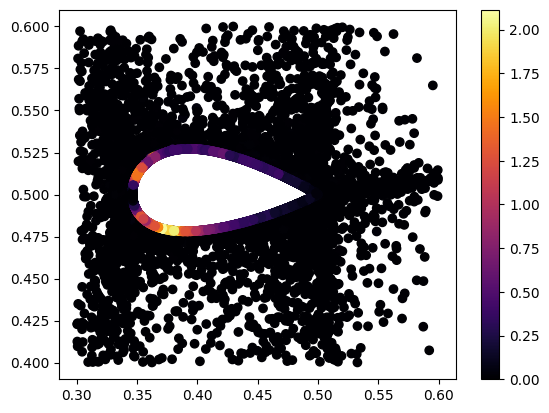

In [134]:
x_mask = (coord_plt[..., 0] < 0.6) & (coord_plt[..., 0] > 0.3)
y_mask = (coord_plt[..., 1] < 0.6) & (coord_plt[..., 1] > 0.4)
plot_mask = x_mask & y_mask
plt.scatter(coord_plt[plot_mask, 0], coord_plt[plot_mask, 1], c=((pred_plt*gamma-img_plt)**2)[plot_mask], cmap="inferno")
plt.colorbar()

In [184]:
from sklearn.cluster import KMeans

In [187]:
clustering_model = KMeans(n_clusters=128, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [ ]:
clustering_model.fit(gr